# Importing Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [2]:
df = pd.read_csv('ObesityDataSet2.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,24,1.58,65.29,yes,no,2.03,2.74,Sometimes,no,2.00,no,1.28,1.019,no,Public_Transportation,Overweight_Level_II
1,Male,23,1.65,66.00,no,no,3.00,3.00,Sometimes,no,2.00,no,3.00,0.000,no,Public_Transportation,Normal_Weight
2,Female,21,1.69,51.26,yes,yes,3.00,3.18,Frequently,no,1.91,no,0.48,0.625,no,Public_Transportation,Insufficient_Weight
3,Female,22,1.69,65.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,1.000,Sometimes,Public_Transportation,Normal_Weight
4,Female,23,1.61,82.64,yes,yes,2.96,1.00,Sometimes,no,2.98,no,0.74,2.000,Sometimes,Public_Transportation,Obesity_Type_I


Read the 'ObesityDataSet2' dataset and show the first five rows

In [ ]:
df.info()                                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1056 non-null   object 
 1   Age                             1056 non-null   object 
 2   Height                          1056 non-null   float64
 3   Weight                          1056 non-null   float64
 4   family_history_with_overweight  1056 non-null   object 
 5   FAVC                            1056 non-null   object 
 6   FCVC                            1019 non-null   float64
 7   NCP                             1056 non-null   float64
 8   CAEC                            1056 non-null   object 
 9   SMOKE                           1056 non-null   object 
 10  CH2O                            1056 non-null   float64
 11  SCC                             1056 non-null   object 
 12  FAF                             10

It shows that the dataset contains 1056 rows and 17 columns. There are two main data types: 7 columns are numerical (`float64`), and 10 are of object type, likely representing categorical variables such as gender or lifestyle habits. The output also reveals that two columns have missing values—`FCVC` with 37 missing entries and `MTRANS` with 26. Additionally, the `Age` column is stored as an object, although it is expected to be numeric

In [4]:
df.shape

(1056, 17)

Show how many rows and columns in this dataset

In [5]:
df.describe()

,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1056.000000,1056.000000,1019.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,1.700066,86.497633,2.421374,2.651686,1.998002,0.987528,0.642227
std,0.091560,26.181219,0.537591,0.804457,0.612930,0.850452,0.615533
min,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.630000,66.000000,2.000000,2.525000,1.530000,0.110000,0.000000
50%,1.700000,82.635000,2.390000,3.000000,2.000000,1.000000,0.583000
75%,1.760000,107.965000,3.000000,3.000000,2.442500,1.602500,1.000000
max,1.950000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


The `describe()` output shows basic statistics like count, mean, standard deviation, min, max, and quartiles for the numerical columns. From this summary, there doesn't appear to be any clear anomalies—most values seem to fall within reasonable ranges. It gives a general sense of the data distribution and helps confirm that the numeric features are mostly consistent

# Preprocessing

## Splitting Data

In [6]:
x = df[df.columns.drop(['NObeyesdad'])]
y = df['NObeyesdad']

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42, stratify= y)

Splits the dataset into features (x) and target (y), where the target column NObeyesdad is separated from the rest. It then uses train_test_split to divide the data into training and testing sets, with 80% of the data used for training and 20% for testing

## Split Column to Numerical and Categorical Column

In [ ]:
cat_cols = []
num_cols = []

for i in x_train.columns:
    if 'int' in str(x_train[i].dtype) or 'float' in str(x_train[i].dtype):
        num_cols.append(i)
    else:
        cat_cols.append(i)

print(f'Categorical: {cat_cols}')
print(f'Numeric: {num_cols}')

Categorical: ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Numeric: ['Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Split the column to numerical and categorical column

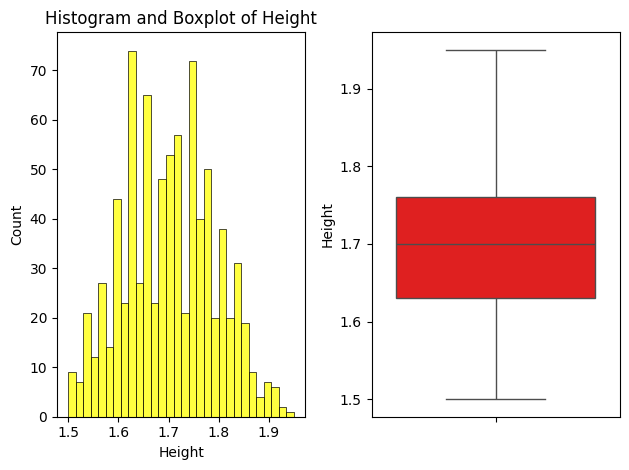

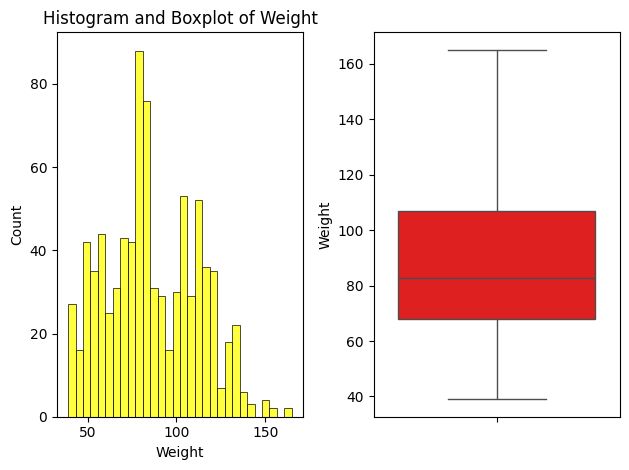

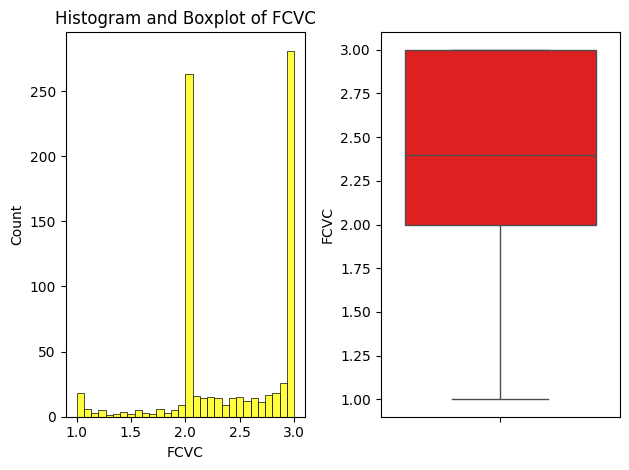

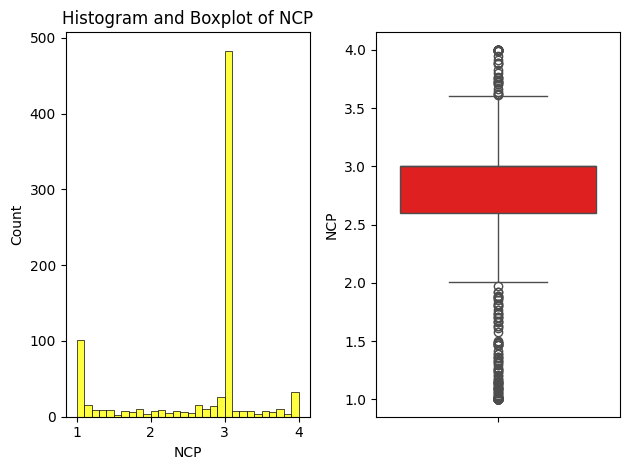

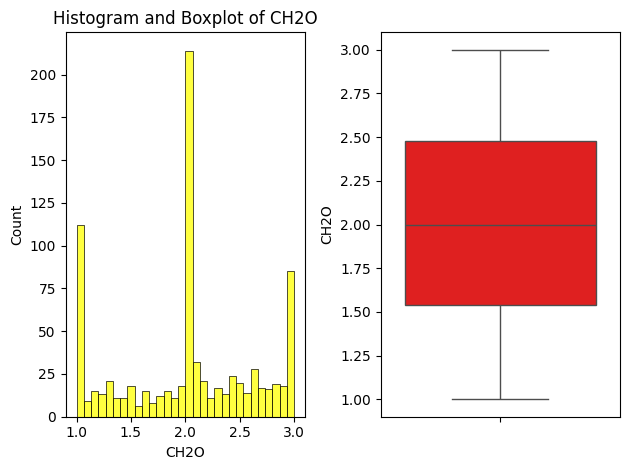

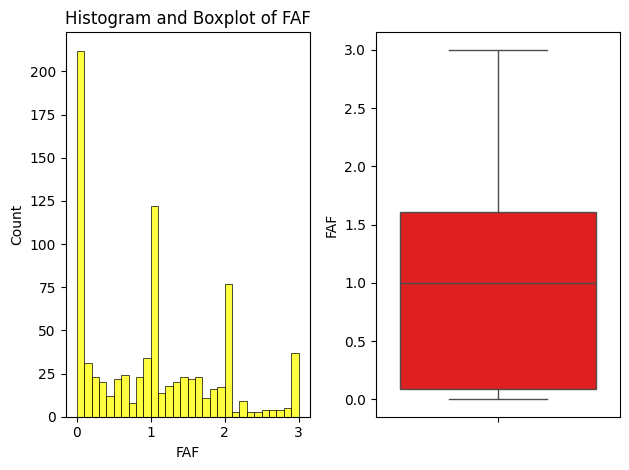

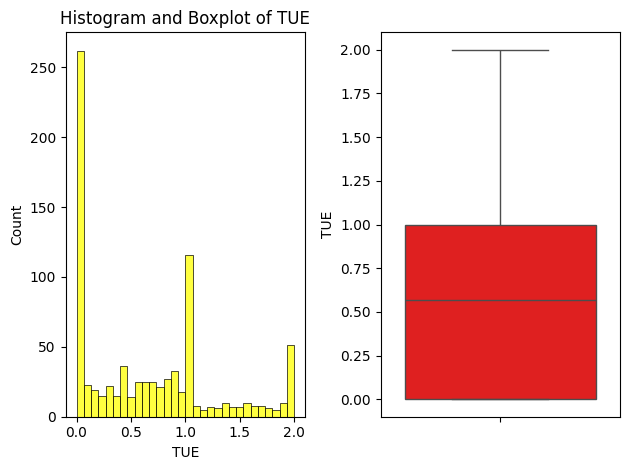

In [9]:
# Plotting
for i in num_cols:
  plt.subplot(1,2,1)
  sns.histplot(x_train[i], bins = 30, color="yellow")
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(x_train[i], color="red")
  plt.tight_layout()
  plt.show()

**Height:**
The height values are approximately normally distributed with a slight left skew. Most individuals fall between 1.6 and 1.8 meters. The boxplot does not show significant outliers, and the interquartile range (IQR) is relatively narrow, indicating that most height values are close to the median.

**Weight:**
The weight distribution is slightly left-skewed, with most individuals weighing between 70 and 110 kilograms. There are a few outliers, particularly in the upper range, as visible in the boxplot. This suggests a small portion of the population has significantly higher weights.

**FCVC (Frequency of consumption of vegetables):**
The FCVC variable is slightly right-skewed, with most values concentrated around 2.5 to 3.0, indicating a relatively healthy frequency of vegetable consumption among respondents. The boxplot confirms a fairly tight distribution without extreme outliers.

**NCP (Number of main meals):**
NCP shows a strong central peak around 3, which is typical for the number of main meals per day. However, some data points at 1 and 4 create long tails, which are evident in the histogram. The boxplot indicates that there are some lower-end outliers (values of 1), but most values remain within a normal range.

**CH2O (Water consumption in liters):**
CH2O shows a left-skewed distribution with a central tendency around 2.0. Most individuals consume between 1.5 to 2.5 liters per day. The boxplot shows that the data is fairly concentrated with minimal outliers, suggesting a consistent hydration pattern.

**FAF (Physical activity frequency):**
The physical activity frequency is left-skewed, with a large number of individuals reporting low activity (around 0.0). Despite this, some people have moderate to high activity levels. The boxplot shows a wide IQR and some outliers, indicating variability in exercise habits.

**TUE (Time using technology per day):**
TUE is heavily left-skewed, with most people using technology for 0 to 0.5 hours daily. This could indicate either a population that doesn't rely much on digital devices or underreporting. The boxplot highlights a significant spread in the data and the presence of upper outliers.

## Categorical Column Distribution

In [ ]:
for col in cat_cols:
    print(f"Value counts for {col}\n")
    print(x_train[col].value_counts())
    print("\n" + "-"*50 + "\n") 

Value counts for Gender

Gender
Male      427
Female    417
Name: count, dtype: int64

--------------------------------------------------

Value counts for Age

Age
21          96
23          91
26          86
18          82
19          63
20          61
22          60
24          39
17          27
25          27
31          25
38          19
30          19
27          17
33          15
34          12
32          12
16           9
29           9
39           9
41           8
28           8
35           7
37           7
40           6
55           3
21 years     3
46           2
42           2
44           2
36           2
22 years     2
51           1
25 years     1
48           1
14           1
33 years     1
45           1
15           1
23 years     1
26 years     1
19 years     1
36 years     1
17 years     1
43           1
20 years     1
Name: count, dtype: int64

--------------------------------------------------

Value counts for family_history_with_overweight

family_history_wi

**Gender:**
The dataset is balanced in terms of gender, with 427 males and 417 females. This near-equal distribution helps avoid gender bias in analysis or modeling.

**Age(Should be in numeric):**
The majority of individuals are young adults, particularly aged 21 (96 people), 23 (91 people), and 26 (86 people). There are also notable counts for ages 18 to 22. Some entries contain age labels as strings (e.g., “21 years”), which may require cleaning. Older age groups are underrepresented, with only a few instances above age 40.

**Family History with Overweight:**
A large proportion of respondents (696) report having a family history of overweight, while only 148 report no such history. This suggests a potential genetic or environmental influence that could be explored in relation to health or lifestyle outcomes.

**FAVC (Frequent consumption of high caloric food):**
Most individuals (747) admitted to frequent consumption of high-calorie foods, whereas only 97 did not. This indicates that unhealthy dietary habits are prevalent in the dataset.

**CAEC (Consumption of food between meals):**
A majority (696) eat between meals “Sometimes,” followed by “Frequently” (103), and a small group “Always” (23). Only 22 individuals report not eating between meals at all. Snacking appears to be a common habit among the population.

**SMOKE:**
Smoking is very rare in this dataset, with only 16 smokers compared to 828 non-smokers. This variable may have limited influence due to the class imbalance.

**SCC (Monitoring of calorie consumption):**
Most participants (801) do not monitor their calorie intake, and only 43 do. This indicates a general lack of calorie awareness among respondents, which may correlate with other health behaviors.

**CALC (Consumption of alcohol):**
Most individuals consume alcohol “Sometimes” (548), while 268 say they do not drink. Only a few drink “Frequently” (27) or “Always” (1). Moderate drinking behavior seems to dominate this sample.

**MTRANS (Transportation used):**
Public transportation is the most common mode of transport (614 people), followed by automobiles (175). Only a small number of people walk (26), use motorbikes (6), or bikes (3). This may reflect urban infrastructure or commuting preferences.


## Target Column Distribution

In [11]:
print(pd.Series(y_train).value_counts())

NObeyesdad
Obesity_Type_I         141
Obesity_Type_III       129
Obesity_Type_II        119
Overweight_Level_II    116
Overweight_Level_I     116
Normal_Weight          114
Insufficient_Weight    109
Name: count, dtype: int64


The **NObeyesdad** column, which represents nutritional obesity diagnosis categories, shows a fairly balanced distribution across all weight classes. The dataset contains a significant portion of individuals classified under obesity: Obesity Type I (141), Obesity Type III (129), and Obesity Type II (119), suggesting that nearly half of the participants fall into obese categories. Additionally, both Overweight Level I and Level II have equal representation with 116 individuals each, indicating that a large number of individuals are already above a healthy weight and may be at risk of obesity. Meanwhile, Normal Weight (114) and Insufficient Weight (109) categories also have comparable counts, showing that the dataset includes individuals across the full spectrum of body weight classifications. This balanced class distribution makes the dataset appropriate for training multi-class classification models, though the prevalence of overweight and obesity highlights the importance of studying related lifestyle and health factors.


## Handle Anomaly

### Anomaly in age column 

In [12]:
def extract_numeric_age(value):
    if type(value) == str:
        digits_only = ''.join([char for char in value if char.isdigit()])
        return float(digits_only)
    else:
        return value

x_train['Age'] = x_train['Age'].apply(extract_numeric_age)
x_test['Age'] = x_test['Age'].apply(extract_numeric_age)

The function `extract_numeric_age` is used to clean and convert the values in the **Age** column, particularly when the values are in string format such as `"21 years"` or `"19 tahun"`. It works by checking if a given value is a string; if so, it extracts only the digit characters and converts them into a float. If the value is already numeric, it is returned unchanged. This is important because inconsistent formatting in age entries—where some are written as plain numbers and others include text—can interfere with data preprocessing and modeling. By applying this function to both the training and testing sets (`x_train` and `x_test`)

In [13]:
print(x_train['Age'].value_counts())

Age
21.0    99
23.0    92
26.0    87
18.0    82
19.0    64
22.0    62
20.0    62
24.0    39
17.0    28
25.0    28
31.0    25
38.0    19
30.0    19
27.0    17
33.0    16
34.0    12
32.0    12
16.0     9
39.0     9
29.0     9
41.0     8
28.0     8
35.0     7
37.0     7
40.0     6
55.0     3
36.0     3
46.0     2
44.0     2
42.0     2
51.0     1
14.0     1
48.0     1
45.0     1
15.0     1
43.0     1
Name: count, dtype: int64


Check if the function already work properly

## Handle Duplicate Data

In [14]:
print(x_train.duplicated().sum())

9


Check if there is any duplicate value in the train data

In [ ]:
def remove_duplicates(x_data, y_data, set_name=""):
    original_size = len(x_data)
    non_duplicate_mask = ~x_data.duplicated(keep='first')
    
    x_clean = x_data[non_duplicate_mask]
    y_clean = y_data[non_duplicate_mask]
    
    removed = original_size - len(x_clean)    
    assert len(x_clean) == len(y_clean), f"{set_name} set misalignment!"
    return x_clean, y_clean

x_train, y_train = remove_duplicates(x_train, y_train, set_name="Training")
x_test, y_test = remove_duplicates(x_test, y_test, set_name="Test")

print("Final data shapes after removing duplicates")
print(f"Train set: x = {x_train.shape}, y = {y_train.shape}")
print(f"Test set : x = {x_test.shape}, y = {y_test.shape}")


Final data shapes after removing duplicates
Train set: x = (835, 16), y = (835,)
Test set : x = (212, 16), y = (212,)


The function `remove_duplicates` is designed to identify and remove duplicate rows from a dataset while maintaining alignment between the feature set (`x_data`) and the corresponding labels (`y_data`). It works by creating a boolean mask that flags non-duplicate entries using the `duplicated` method, retaining only the first occurrence of any duplicate. The cleaned versions of both `x_data` and `y_data` are then returned, with a safeguard `assert` statement ensuring that the number of rows in both sets remains equal, thus preventing any potential misalignment between features and labels. This function is applied separately to both the training and testing datasets to ensure that no repeated records skew the learning process or evaluation results. Finally, the code prints out the new dimensions of the cleaned training and testing sets, providing clear feedback on how many duplicates were removed

In [16]:
print(x_train.duplicated().sum())

0


Check if the function `remove_duplicates` already worked properly

## Checking Missing Values

In [17]:
ordinal_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']
onehot_columns = ['MTRANS']
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

* `ordinal_columns` contains categorical features with an implicit order or limited set of categories that can be encoded with label or ordinal encoding (e.g., gender, smoking habits).
* `onehot_columns` includes categorical features like `MTRANS` that require one-hot encoding due to having multiple distinct categories without order.
* `numerical_columns` lists continuous or numeric features that can be used as-is or scaled for modeling.

In [18]:
print(x_train.isnull().sum())

Gender                             0
Age                                0
Height                             0
Weight                             0
family_history_with_overweight     0
FAVC                               0
FCVC                              31
NCP                                0
CAEC                               0
SMOKE                              0
CH2O                               0
SCC                                0
FAF                                0
TUE                                0
CALC                               0
MTRANS                            20
dtype: int64


Checking how many missing value in each column in the dataset

# Pipeline

In [19]:
ordinal_ctg = [
    # Gender
    ['Male', 'Female'],
    # FamilyHistoryWithOverweight
    ['no', 'yes'],
    # FAVC
    ['no', 'yes'],
    # CAEC
    ['no', 'Sometimes', 'Frequently', 'Always'],
    # SMOKE
    ['no', 'yes'],
    # SCC
    ['no', 'yes'],
    # CALC
    ['no', 'Sometimes', 'Frequently', 'Always']
]

This list `ordinal_ctg` defines the specific order of categories for each feature listed in `ordinal_columns`

In [ ]:
ordinal_cols_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('encoder', OrdinalEncoder(categories= ordinal_ctg))
])

onehot_cols_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown= 'ignore'))
])

num_cols_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'mean')),
    ('scaler', RobustScaler())
])

* `ordinal_cols_pipeline` handles ordinal categorical columns by first filling in missing values with the most frequent category, then applying `OrdinalEncoder` using the predefined category order (`ordinal_ctg`).

* `onehot_cols_pipeline` processes nominal categorical columns by imputing missing values with the most frequent one, then applying `OneHotEncoder` to convert them into binary columns while ignoring unknown categories during inference.

* `num_cols_pipeline` deals with numerical columns by imputing missing values with the mean and scaling them using `RobustScaler`, which is resistant to outliers.

In [21]:
preprocessor = ColumnTransformer([
    ('num', num_cols_pipeline, numerical_columns),
    ('ordinal', ordinal_cols_pipeline, ordinal_columns),
    ('onehot', onehot_cols_pipeline, onehot_columns)
])

The `preprocessor` is a `ColumnTransformer` that combines different preprocessing steps for different types of features in the dataset. It applies numerical preprocessing (imputation and scaling) to the numerical columns, ordinal encoding to the ordered categorical columns using a defined category order, and one-hot encoding to nominal categorical columns. This setup ensures that all features are properly cleaned and transformed in a single unified step before model training

In [22]:
preprocessor

,transformers,"[('num', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


Check the preprocessor

# Modelling

## Random Forest

In [23]:
RF_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,        
        max_depth=8,            
        min_samples_split=5,        
        min_samples_leaf=3,        
        max_features='sqrt',        
        class_weight='balanced_subsample', 
        random_state=42,
        n_jobs=-1
    ))
])

The `RF_pipeline` is a complete machine learning pipeline that chains preprocessing and model training into one streamlined process. It first applies the `preprocessor` to clean and transform the input features, then trains a `RandomForestClassifier` with specified hyperparameters. These parameters include 200 trees (`n_estimators`), a maximum tree depth of 8, minimum split and leaf sizes to control overfitting, and balanced class weights to handle class imbalance.

In [24]:
RF_pipeline.fit(x_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Trains the entire pipeline on the training data

In [25]:
y_predictRF = RF_pipeline.predict(x_test)

Uses the trained pipeline to make predictions on the test set

In [26]:
print("Classification Report - Random Forest\n")
print(classification_report(y_test, y_predictRF))

Classification Report - Random Forest

                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.96      0.98        27
      Normal_Weight       0.75      0.93      0.83        29
     Obesity_Type_I       0.97      0.83      0.89        35
    Obesity_Type_II       0.94      0.97      0.95        30
   Obesity_Type_III       0.97      0.97      0.97        33
 Overweight_Level_I       0.86      0.83      0.84        29
Overweight_Level_II       0.75      0.72      0.74        29

           accuracy                           0.89       212
          macro avg       0.89      0.89      0.89       212
       weighted avg       0.89      0.89      0.89       212



The classification report shows that the Random Forest model performs well overall, with an **accuracy of 89%** on the test set. Most classes have high precision, recall, and f1-score, especially for extreme classes like `Insufficient_Weight`, `Obesity_Type_III`, and `Obesity_Type_II`, which the model predicts very accurately. However, performance is slightly lower for `Overweight_Level_II` and `Normal_Weight`, where precision and recall drop to the mid-70% range, indicating these classes are more difficult for the model to distinguish. Still, the **macro and weighted averages** for all metrics are balanced and consistently high, reflecting strong overall performance across all classes.

## ADABoost

In [27]:
adaboost_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=3),
        n_estimators=250,
        learning_rate=0.1,
        random_state=42
    ))
])

In [28]:
adaboost_pipeline.fit(x_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ordinal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Trains the entire pipeline on the training data

In [29]:
y_predictADA = adaboost_pipeline.predict(x_test)

Uses the trained pipeline to make predictions on the test set

In [30]:
print("Classification Report - ADA Boost Classifier\n")
print(classification_report(y_test, y_predictADA))

Classification Report - ADA Boost Classifier

                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        27
      Normal_Weight       0.88      0.79      0.84        29
     Obesity_Type_I       0.86      0.91      0.89        35
    Obesity_Type_II       0.94      0.97      0.95        30
   Obesity_Type_III       0.97      0.97      0.97        33
 Overweight_Level_I       0.73      0.93      0.82        29
Overweight_Level_II       0.95      0.69      0.80        29

           accuracy                           0.89       212
          macro avg       0.90      0.89      0.89       212
       weighted avg       0.90      0.89      0.89       212



The classification report for the AdaBoost Classifier shows strong overall performance with **89% accuracy**, matching the result of the Random Forest model. Most classes are predicted with high precision and recall, especially `Insufficient_Weight`, `Obesity_Type_II`, and `Obesity_Type_III`. Notably, AdaBoost performs better on `Overweight_Level_I` compared to Random Forest, with a higher recall (0.93). However, performance on `Overweight_Level_II` drops slightly in recall (0.69), although precision is very high (0.95), indicating it’s more conservative in predicting that class. Overall, the model shows balanced and consistent results across most classes, with a slight trade-off in certain categories

# Two Model Comparison

Based on the results of model testing using the classification report, both AdaBoost Classifier and Random Forest Classifier showed strong performance with an overall accuracy of 89%. However, if examined further based on other evaluation metrics such as precision, recall, and f1-score for each class, there are several striking differences that can be used as a basis for consideration in choosing the best model. 

In the AdaBoost model, the highest f1-score values ​​are seen in the Obesity\_Type\_III (0.97), Insufficient\_Weight (0.96), and Obesity\_Type\_II (0.95) classes. Meanwhile, the weakness of this model is seen in the Overweight\_Level\_II class which only has a recall of 0.69 even though its precision is quite high at 0.95. This means that the model is quite accurate in predicting the class when it decides to label it, but often fails to capture all instances that actually belong to the class. The Overweight\_Level\_I class also shows a similar gap, with high recall (0.93) but lower precision (0.73), indicating that the model tends to overpredict this class.

Meanwhile, the Random Forest model tends to show more balanced performance across most classes. For example, Insufficient\_Weight has an f1-score of 0.98 with perfect precision (1.00), indicating its excellent ability to detect this class without false positives. Normal\_Weight also has a high recall (0.93), but its precision is lower (0.75), indicating that the model sometimes misclassifies samples from other classes as Normal\_Weight. For a difficult class like Overweight\_Level\_II, its performance is lower than the other classes, with an f1-score of only 0.74—although it is still better than the recalled version of the AdaBoost model. On average (macro and weighted), both models score very similarly, at 0.89–0.90 across all metrics, indicating that they are fairly evenly matched in overall performance. However, Random Forest slightly outperforms in the Insufficient\_Weight and Obesity\_Type\_I classes, and has a more consistent distribution of predictions. 

Considering the balance between precision and recall for each class as well as the more even stability of predictions, Random Forest is slightly superior to AdaBoost in this classification context.

# Pickle

In [31]:
filename= 'pickle.pkl'
pickle.dump(RF_pipeline, open(filename, 'wb'))

Save the pipeline from the best model to pickle